<a href="https://colab.research.google.com/github/affandhanbad-dev/ML_Model_Training_notebook/blob/main/ML_Arrhythmia_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

# Data processing

In [ ]:
df = pd.read_csv('arrhythmia.csv')
df.columns = list(range(0, 280))
print(df.head())


   0    1    2    3    4    5    6    7    8    9    ...  270   271  272  273  \
0   56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5  0.0  0.0   
1   54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5 -2.4  0.0   
2   55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2 -2.2  0.0   
3   75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1 -3.6  0.0   
4   13    0  169   51  100  167  321  174   91  107  ... -0.6  12.2 -2.8  0.0   

   274  275  276   277   278  279  
0  0.0  0.2  2.1  20.4  38.8    6  
1  0.0  0.3  3.4  12.3  49.0   10  
2  0.0  0.4  2.6  34.6  61.6    1  
3  0.0 -0.1  3.9  25.4  62.8    7  
4  0.0  0.9  2.2  13.5  31.1   14  

[5 rows x 280 columns]


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
446,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
447,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
450,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [ ]:
df.shape

(451, 280)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 986.7+ KB


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,...,451.000000,451.000000,451.000000,451.000000,451.0,451.000000,451.000000,451.000000,451.000000,451.000000
mean,46.407982,0.552106,166.135255,68.144124,88.915743,155.068736,367.199557,169.940133,89.935698,33.787140,...,-0.279601,9.048115,-1.458537,0.003991,0.0,0.513969,1.218625,19.317295,29.429047,3.871397
std,16.429846,0.497830,37.194646,16.599841,15.381143,44.856534,33.422017,35.672130,25.813912,45.421423,...,0.549328,3.476718,2.004481,0.050173,0.0,0.347441,1.425438,13.517617,18.490566,4.407706
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,4.000000,...,-0.450000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.400000,17.500000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,78.500000,94.000000,174.500000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.850000,41.050000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [ ]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
275,0
276,0
277,0
278,0


In [ ]:
pd.isnull(df).sum().sum()

np.int64(0)

In [ ]:
df = df.replace('?',np.nan)

In [ ]:
nv = pd.isnull(df).sum().sum()
nv

np.int64(407)

Text(0, 0.5, 'no. of null values in each columns')

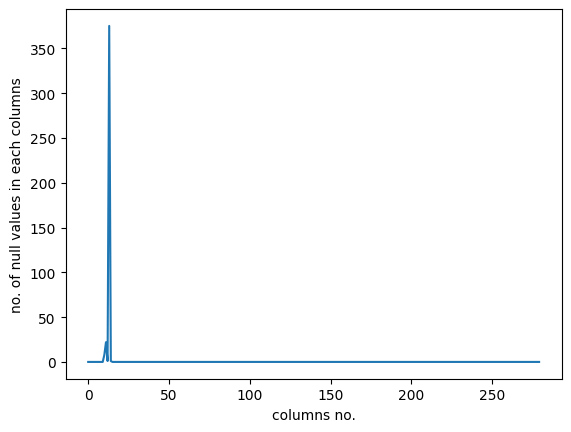

In [ ]:
pd.isnull(df).sum().plot()
plt.xlabel('columns no.')
plt.ylabel('no. of null values in each columns')

Text(0, 0.5, 'no. of null values in each columns')

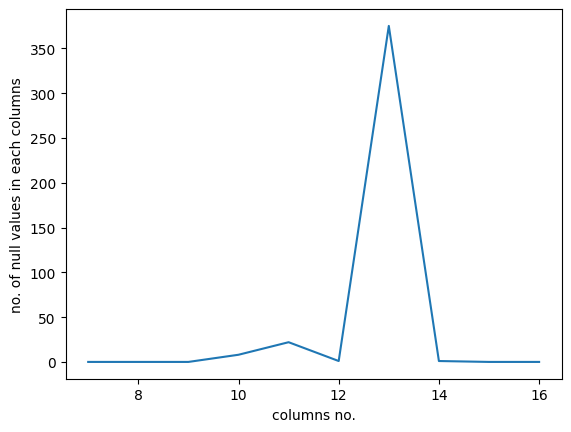

In [ ]:
pd.isnull(df).sum()[7:17].plot()
plt.xlabel('columns no.')
plt.ylabel('no. of null values in each columns')

In [ ]:
df.drop(columns =13,inplace = True)

In [ ]:
new_df = df.copy()

In [ ]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


In [ ]:
col_null = (col for col in new_df.columns if new_df[col].isnull().any())
for col in col_null:
  new_df[col] = new_df[col].isnull()

In [ ]:
imputer = SimpleImputer()
new_df = pd.DataFrame(imputer.fit_transform(new_df))
new_df.columns = df.columns

In [ ]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
1,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
2,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
3,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0
4,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14.0


In [ ]:
pd.isnull(new_df).sum().sum()

np.int64(0)

In [ ]:
final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom",
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [ ]:
new_df.columns=final_df_columns

In [ ]:
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
1,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
2,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
3,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0
4,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14.0


In [ ]:
target = new_df['class']
final_df = new_df.drop(columns = 'class')

In [ ]:
final_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
1,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
2,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
3,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
4,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,0.0,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1


In [ ]:
final_df.describe()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,...,451.000000,451.000000,451.000000,451.000000,451.000000,451.0,451.000000,451.000000,451.000000,451.000000
mean,46.407982,0.552106,166.135255,68.144124,88.915743,155.068736,367.199557,169.940133,89.935698,33.787140,...,-0.302439,-0.279601,9.048115,-1.458537,0.003991,0.0,0.513969,1.218625,19.317295,29.429047
std,16.429846,0.497830,37.194646,16.599841,15.381143,44.856534,33.422017,35.672130,25.813912,45.421423,...,0.604221,0.549328,3.476718,2.004481,0.050173,0.0,0.347441,1.425438,13.517617,18.490566
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,4.000000,...,-0.500000,-0.450000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.400000,17.500000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,-0.200000,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.900000
75%,58.000000,1.000000,170.000000,78.500000,94.000000,174.500000,384.000000,179.000000,102.000000,66.000000,...,0.000000,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.850000,41.050000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000


In [ ]:
final_df['Sex'].value_counts()

,count
Sex,
1.0,249
0.0,202


In [ ]:
final_df.shape

(451, 278)

# Exploratory Data Analysis (EDA)

In [ ]:
class_names = ["Normal",
               "Ischemic changes (CAD)",
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy",
               "Sinus bradycardy",
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

In [ ]:
t = new_df.sort_values(by=['class'])
t.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
440,37.0,1.0,160.0,50.0,74.0,143.0,374.0,146.0,75.0,68.0,...,0.0,11.4,-0.9,0.0,0.0,0.7,1.8,40.1,55.5,1.0
441,65.0,1.0,160.0,50.0,85.0,143.0,363.0,146.0,84.0,-40.0,...,0.0,6.6,-6.1,0.0,0.0,0.5,0.5,-3.8,0.4,1.0
30,58.0,1.0,163.0,68.0,71.0,136.0,339.0,152.0,76.0,13.0,...,0.0,6.9,-0.8,0.0,0.0,0.4,1.4,13.5,25.5,1.0
31,50.0,1.0,160.0,73.0,75.0,125.0,353.0,183.0,63.0,38.0,...,-0.5,8.1,-0.8,0.0,0.0,0.7,2.5,14.5,39.5,1.0
16,46.0,1.0,158.0,58.0,70.0,120.0,353.0,122.0,52.0,57.0,...,0.0,6.6,0.0,0.0,0.0,0.3,0.7,17.1,20.8,1.0


In [ ]:
t['class'].value_counts()

,count
class,
1.0,245
10.0,50
2.0,44
6.0,25
16.0,22
3.0,15
4.0,15
5.0,13
9.0,9


In [ ]:
values = t['class'].value_counts()
values

,count
class,
1.0,245
10.0,50
2.0,44
6.0,25
16.0,22
3.0,15
4.0,15
5.0,13
9.0,9


/tmp/ipython-input-743944258.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'class', data = t, palette = 'Set2')


Text(0.5, 0, 'class')

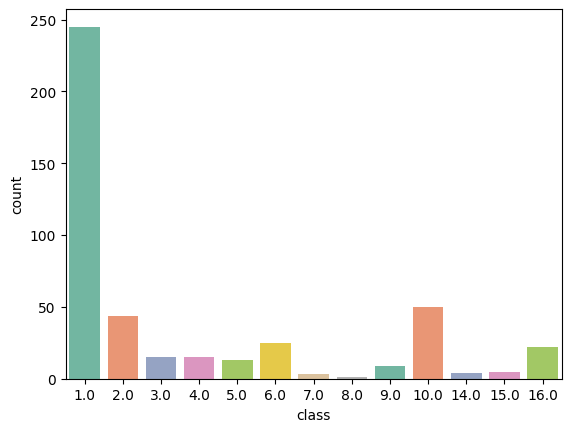

In [ ]:
sns.countplot(x = 'class', data = t, palette = 'Set2')
plt.xlabel('class')

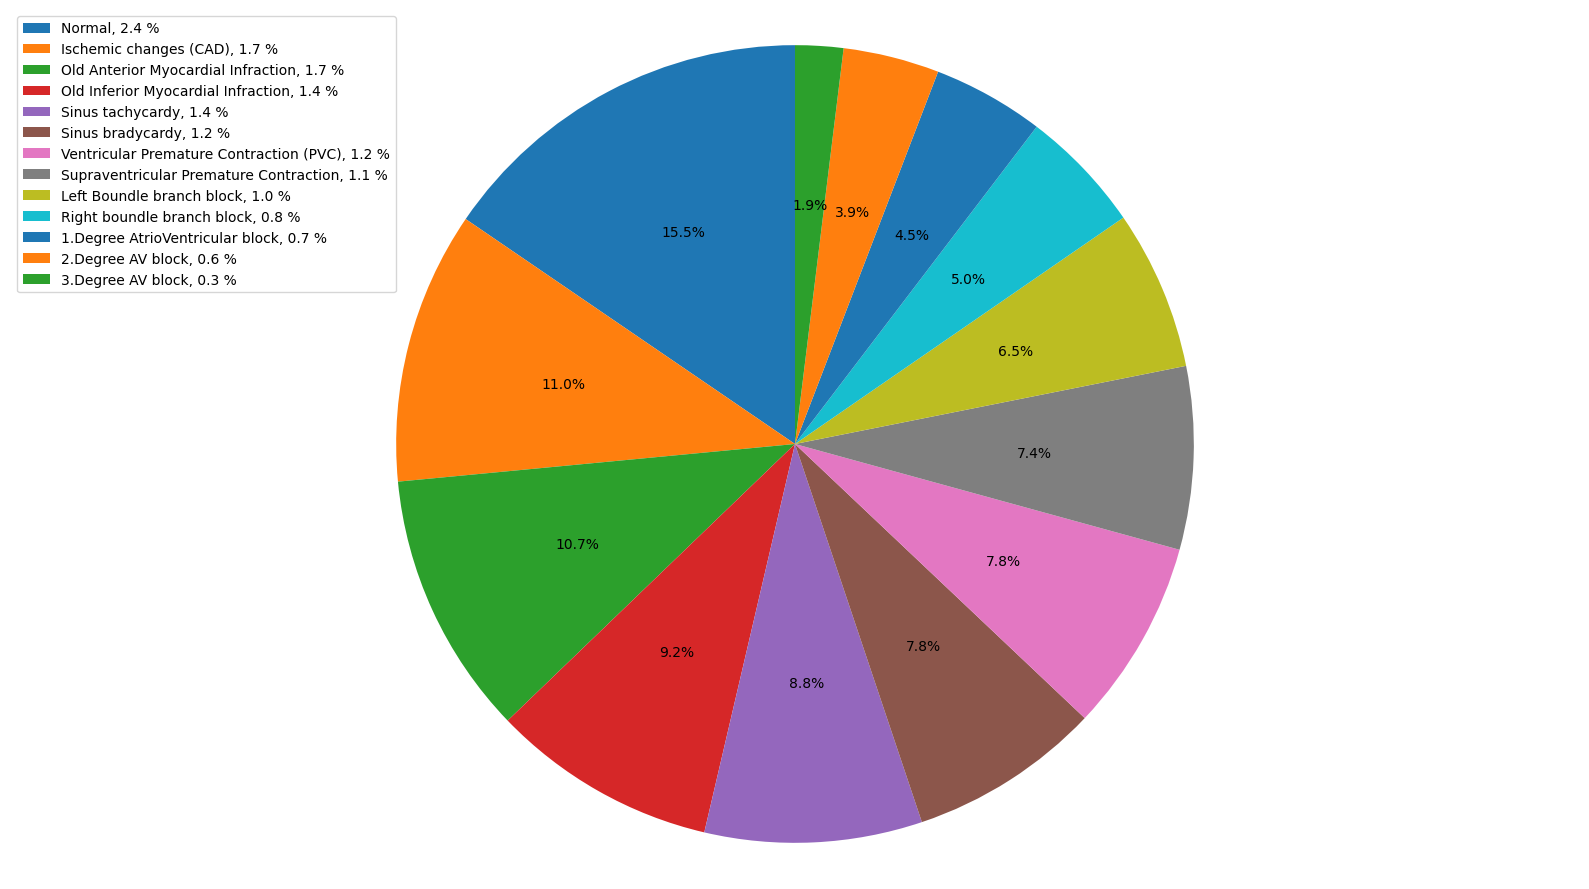

In [ ]:
labels = class_names
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

<Figure size 700x700 with 0 Axes>

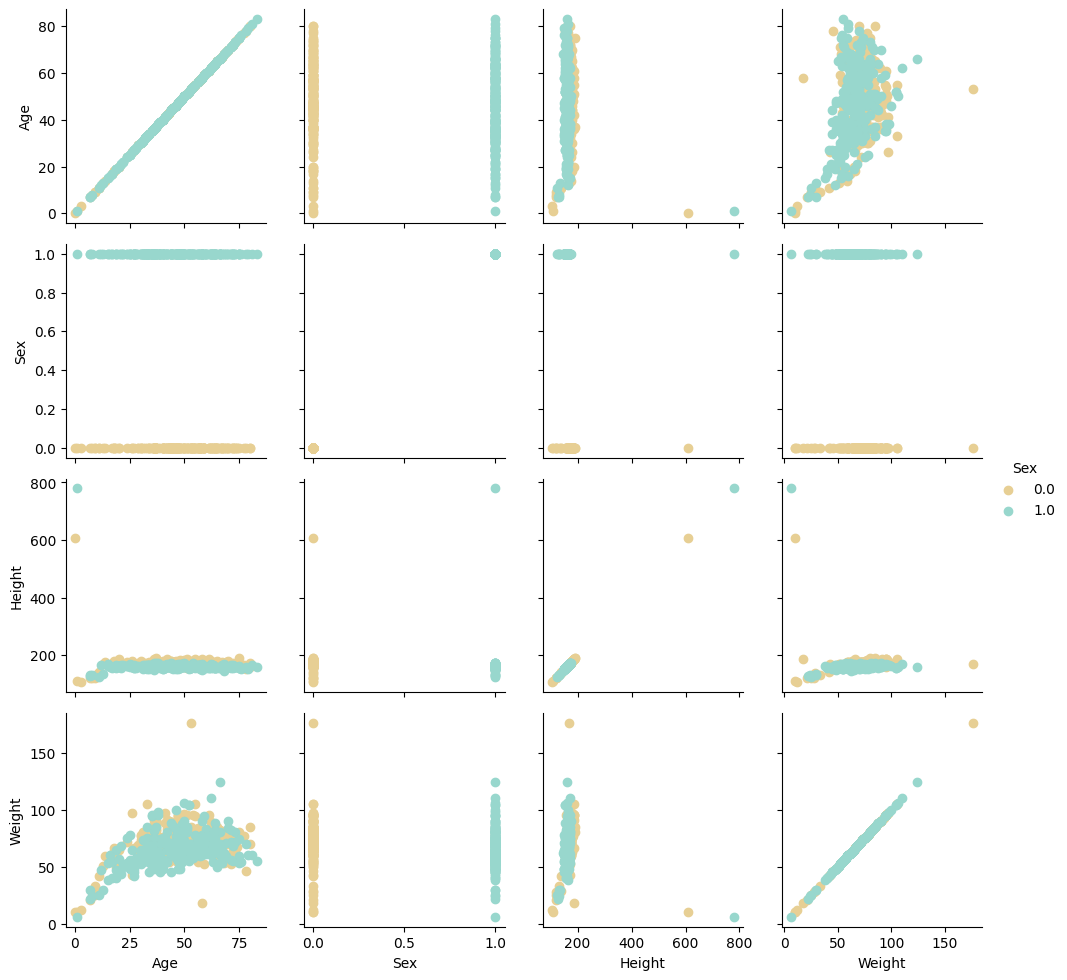

In [ ]:
plt.figure(figsize=(7,7))
g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=1)
g.add_legend();

In [ ]:
sorted(final_df['Height'],reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0, 185.0]

In [ ]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [ ]:
sorted(final_df['Weight'],reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

<Figure size 700x700 with 0 Axes>

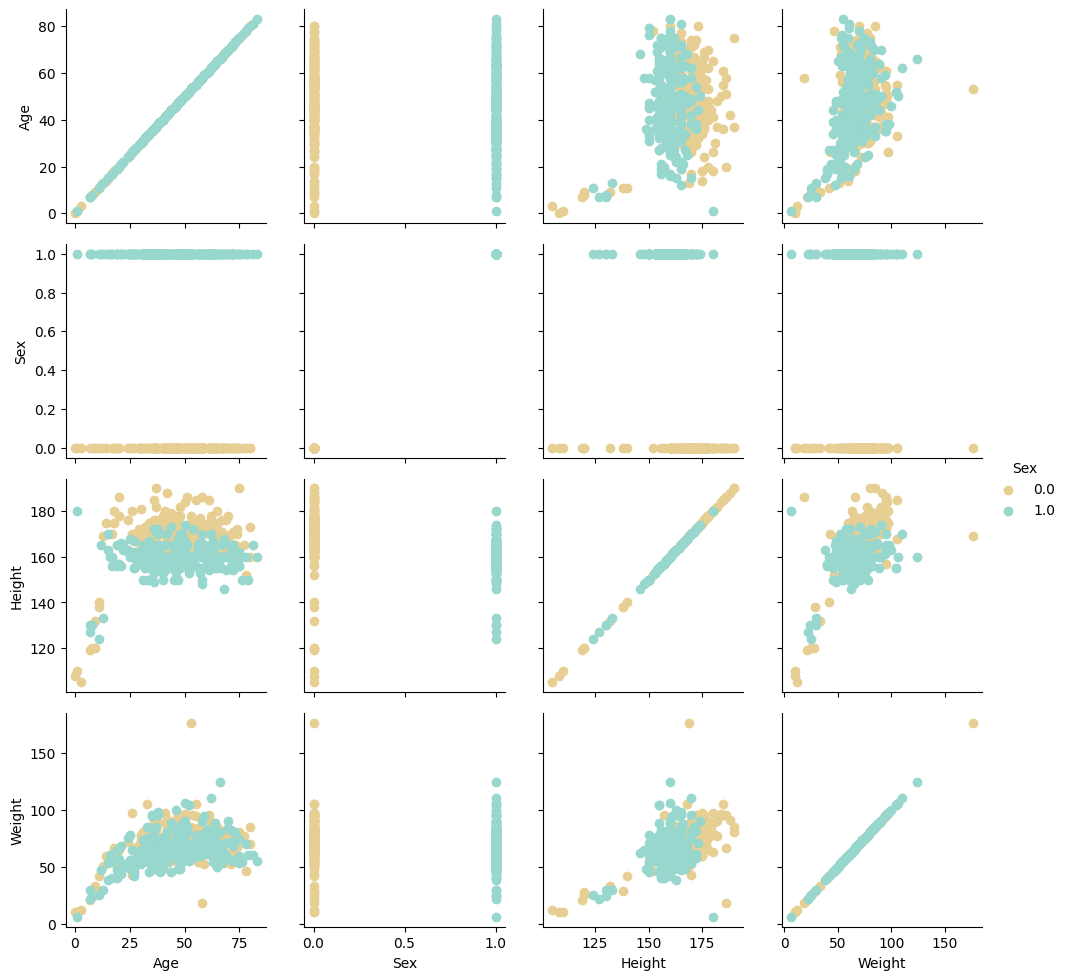

In [ ]:
plt.figure(figsize=(7,7))
g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=1)
g.add_legend();

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 278 entries, Age to V6279
dtypes: float64(278)
memory usage: 979.6 KB


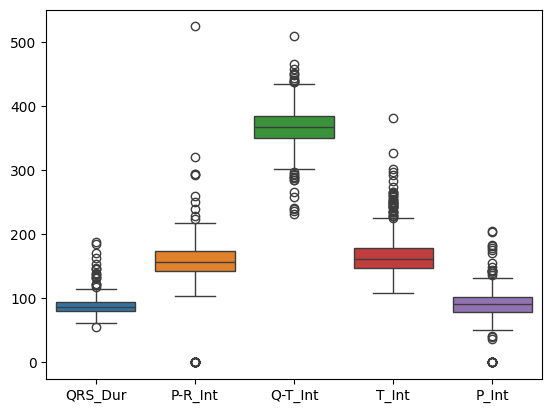

In [ ]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

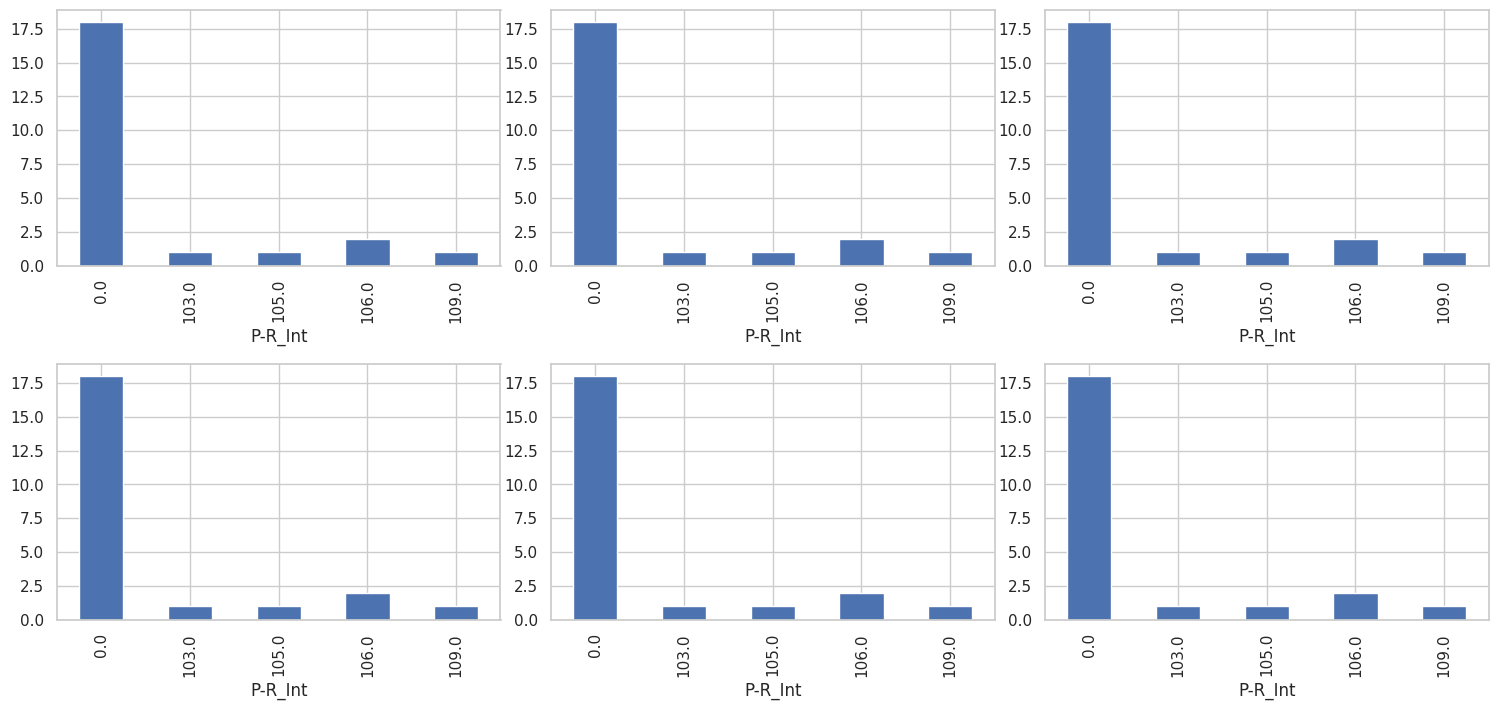

In [ ]:
sns.set(style = "whitegrid")
plt.figure(figsize=(15,10))
x = ["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int","QRS"]
for i, column in enumerate (x,1):
  plt.subplot(3,3,i)
  final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.tight_layout()
plt.show()

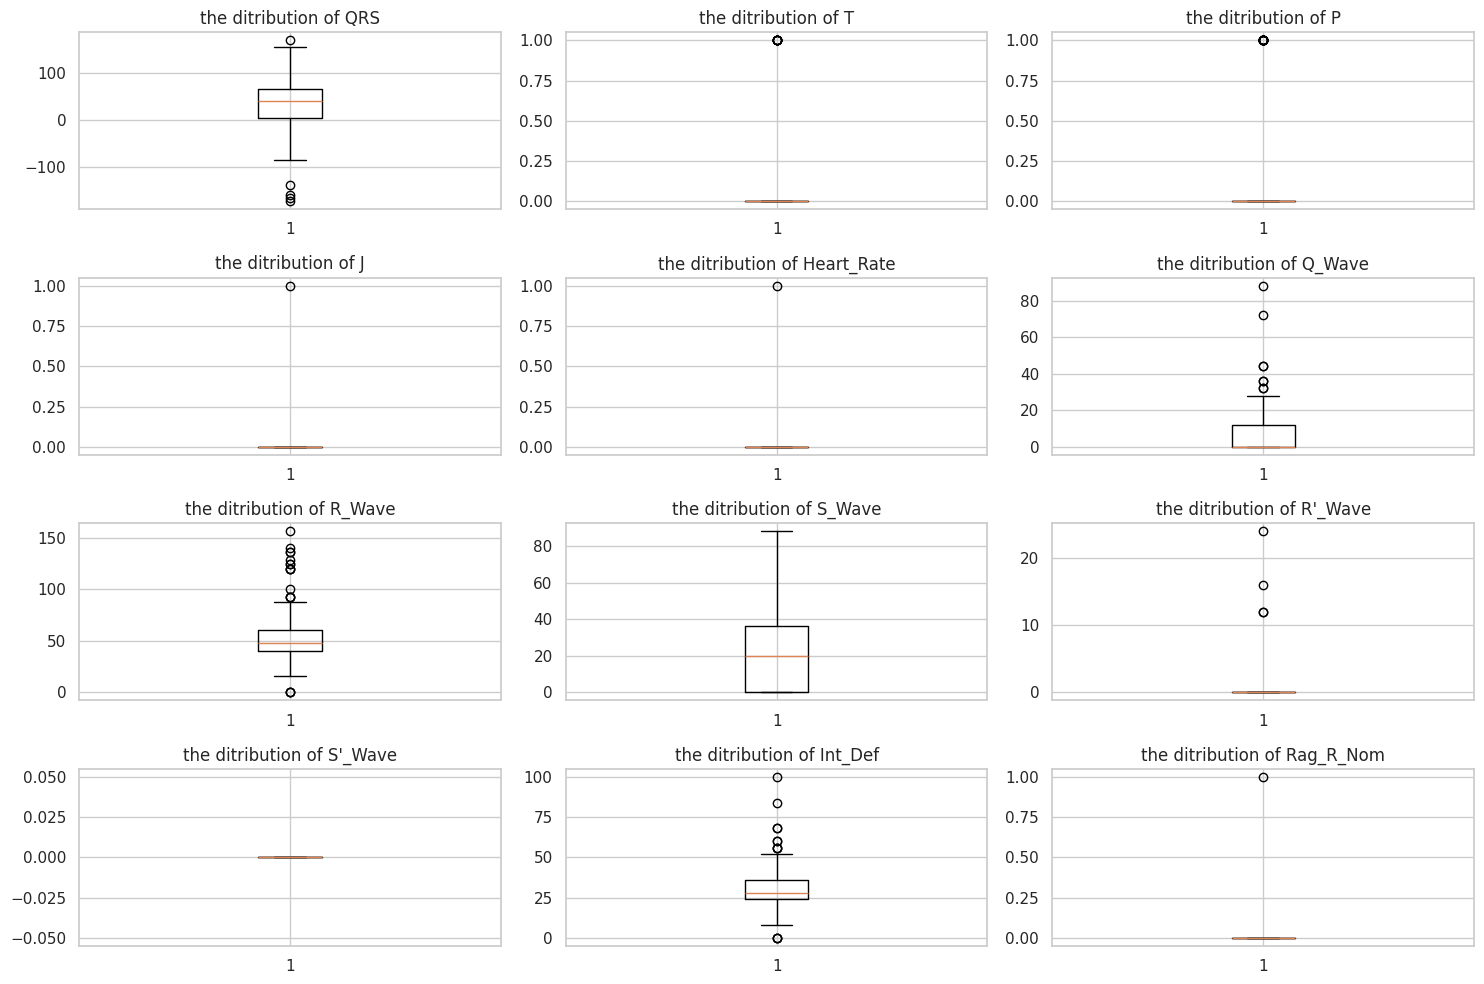

In [ ]:
sns.set(style = "whitegrid")
plt.figure(figsize=(15,10))
x = ["QRS","T","P","J","Heart_Rate","Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]
for i, column in enumerate (x,1):
  plt.subplot(4,3,i)
  plt.boxplot(final_df[column])
  plt.title(f"the ditribution of {column}")
plt.tight_layout()
plt.show()

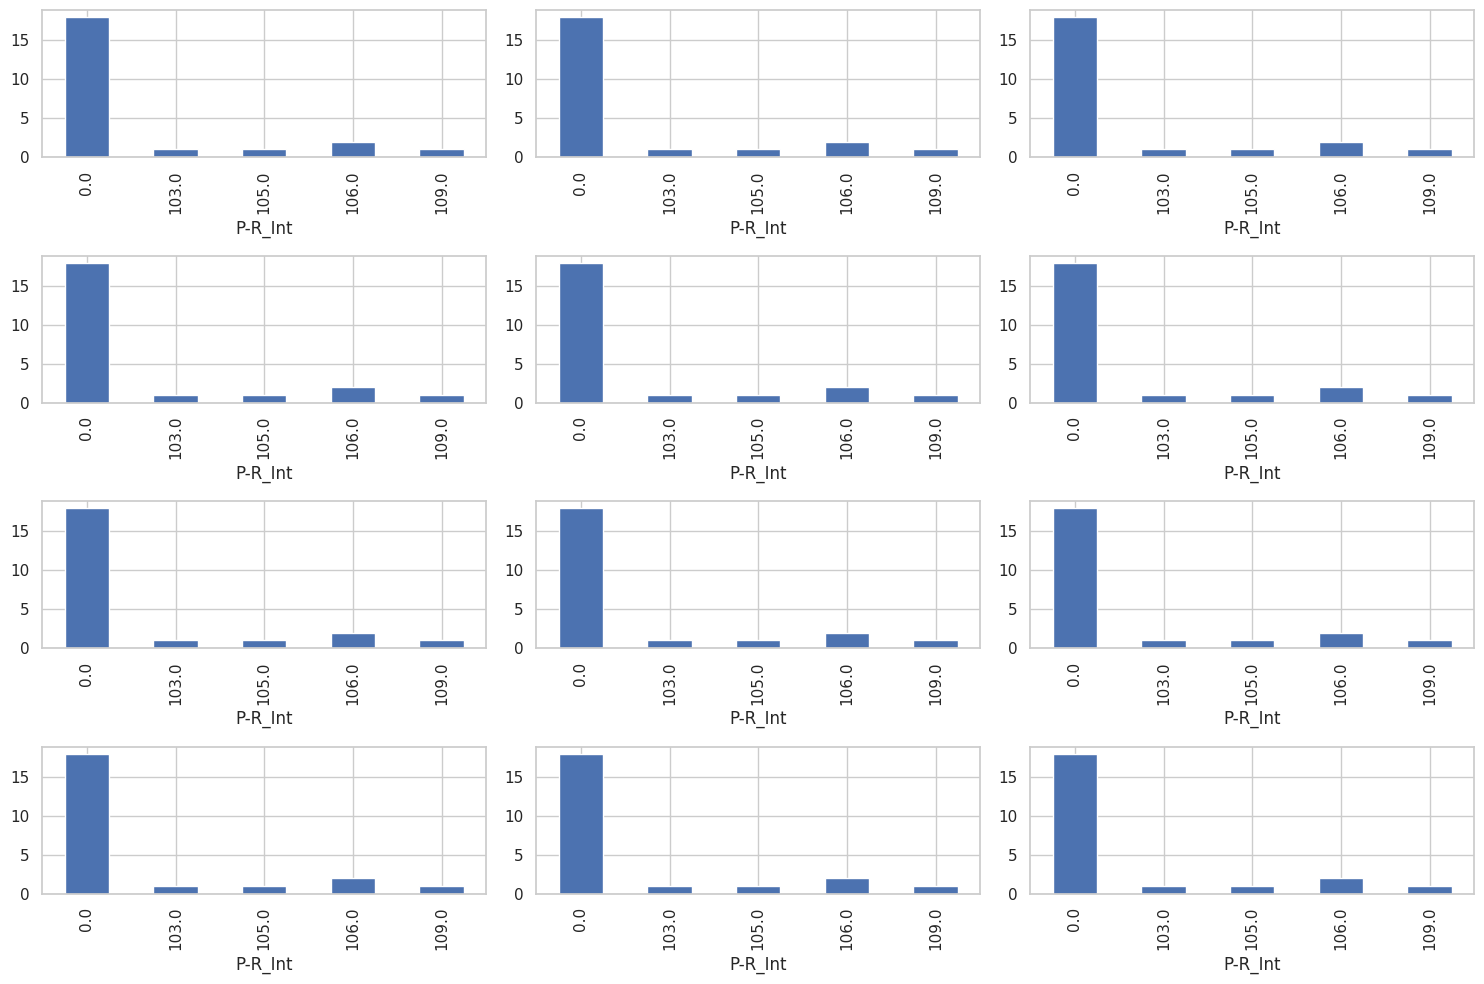

In [ ]:
sns.set(style = "whitegrid")
plt.figure(figsize=(15,10))
x = ["QRS","T","P","J","Heart_Rate","Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]
for i, column in enumerate (x,1):
  plt.subplot(4,3,i)
  final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.tight_layout()
plt.show()

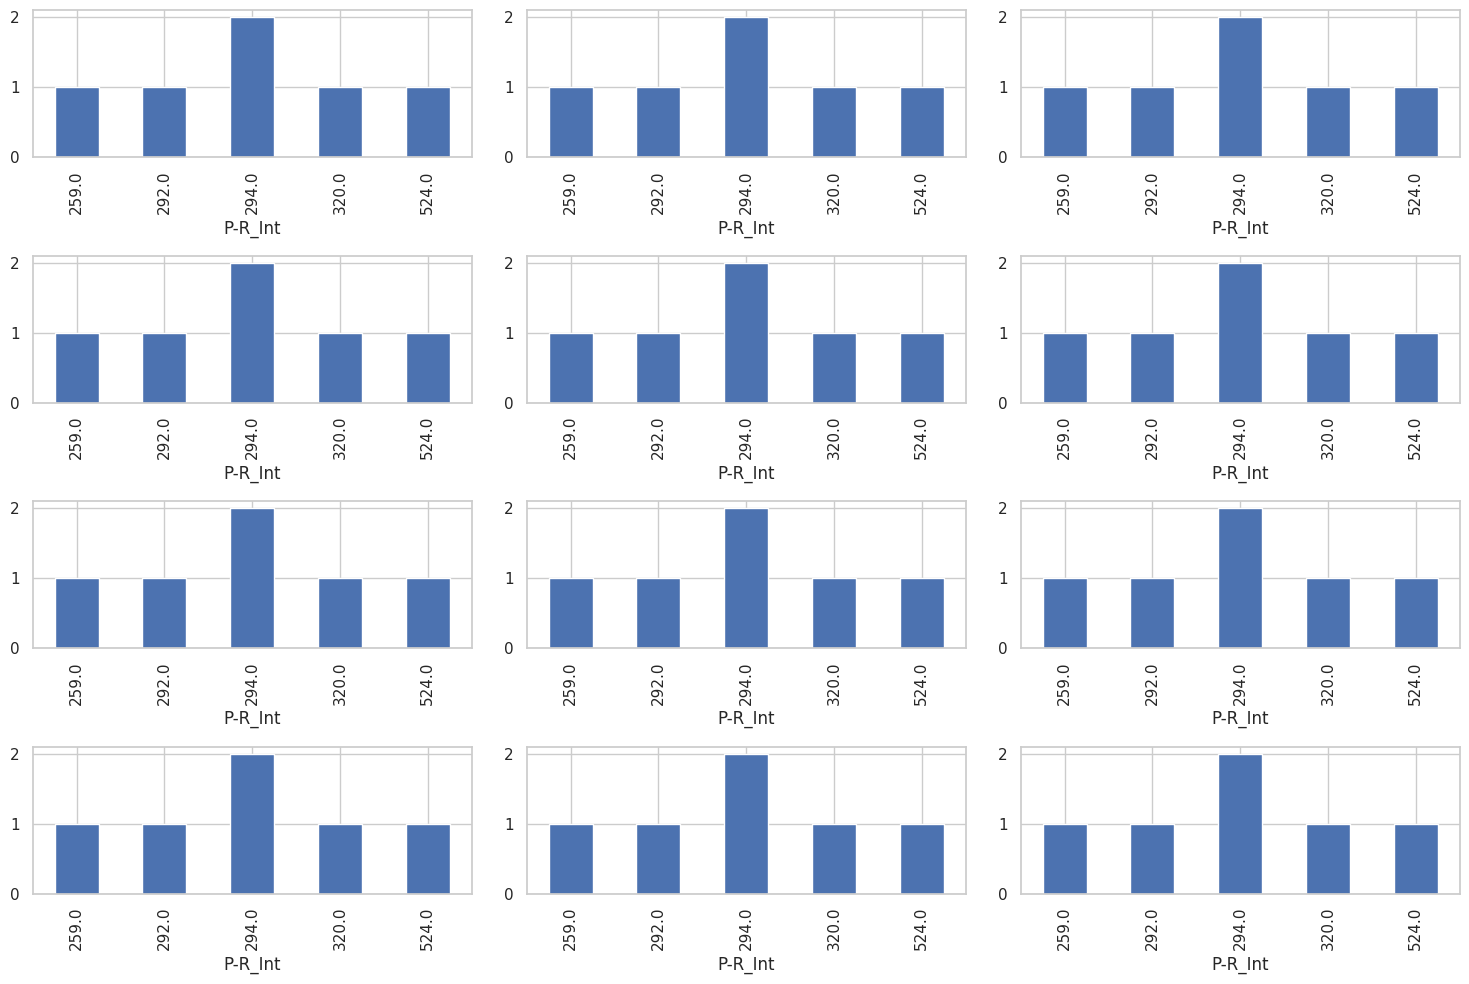

In [ ]:
sns.set(style = "whitegrid")
plt.figure(figsize=(15,10))
x = ["QRS","T","P","J","Heart_Rate","Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]
for i, column in enumerate (x,1):
  plt.subplot(4,3,i)
  final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.tight_layout()
plt.show()

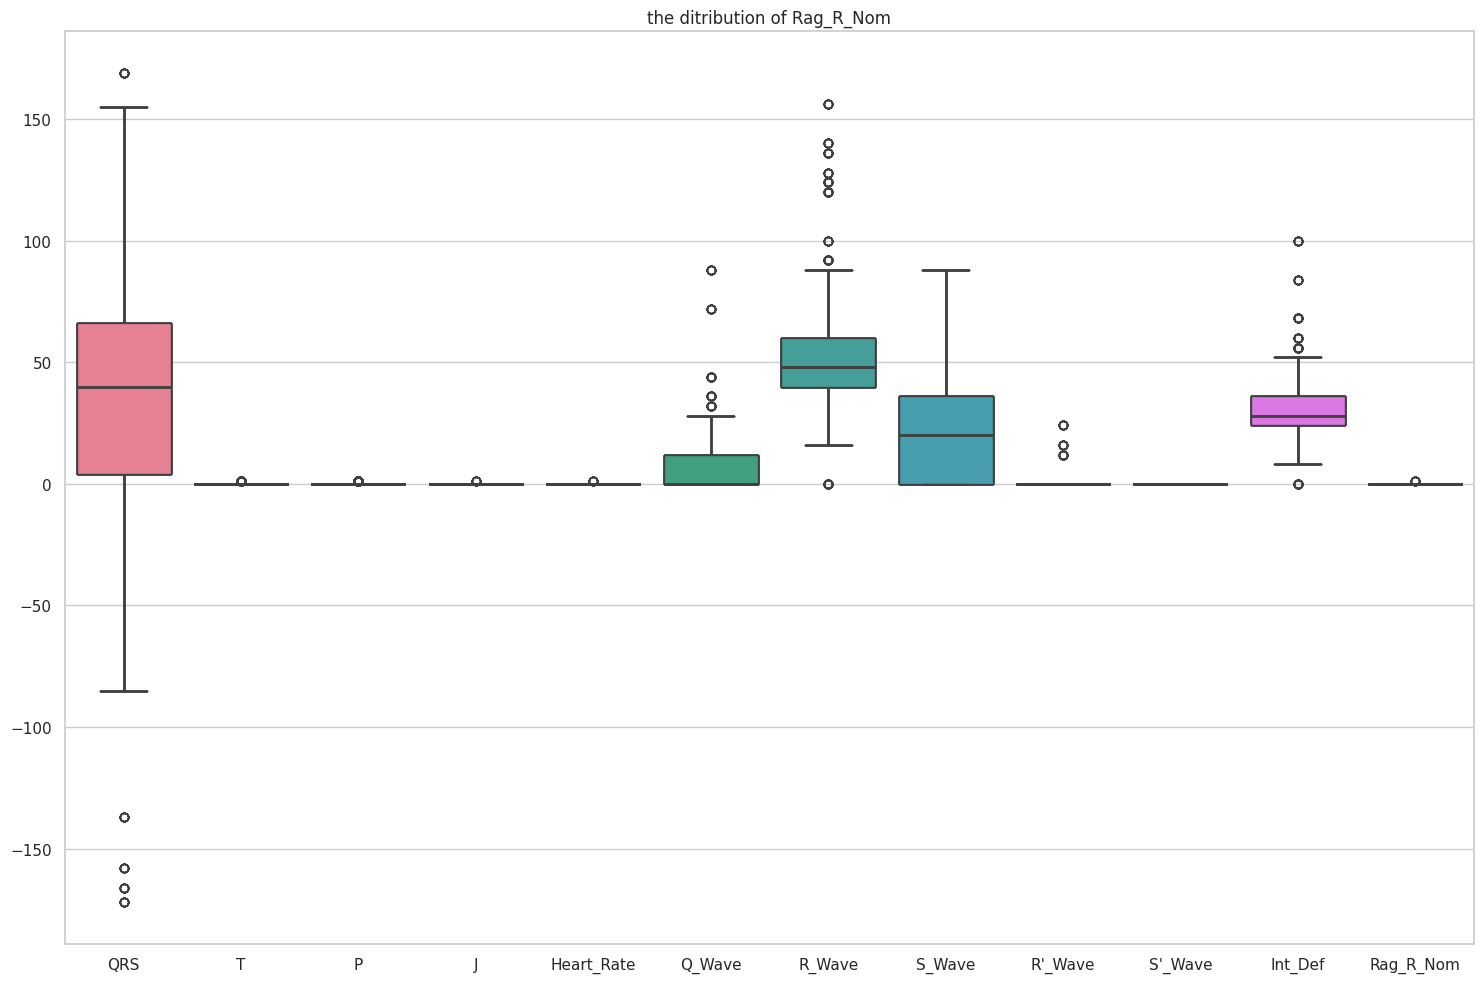

In [ ]:
sns.set(style = "whitegrid")
plt.figure(figsize=(15,10))
x = ["QRS","T","P","J","Heart_Rate","Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]
for i, column in enumerate (x,1):
  # plt.subplot(4,3,i)
  sns.boxplot(data=final_df[x]);
  plt.title(f"the ditribution of {column}")
plt.tight_layout()
plt.show()

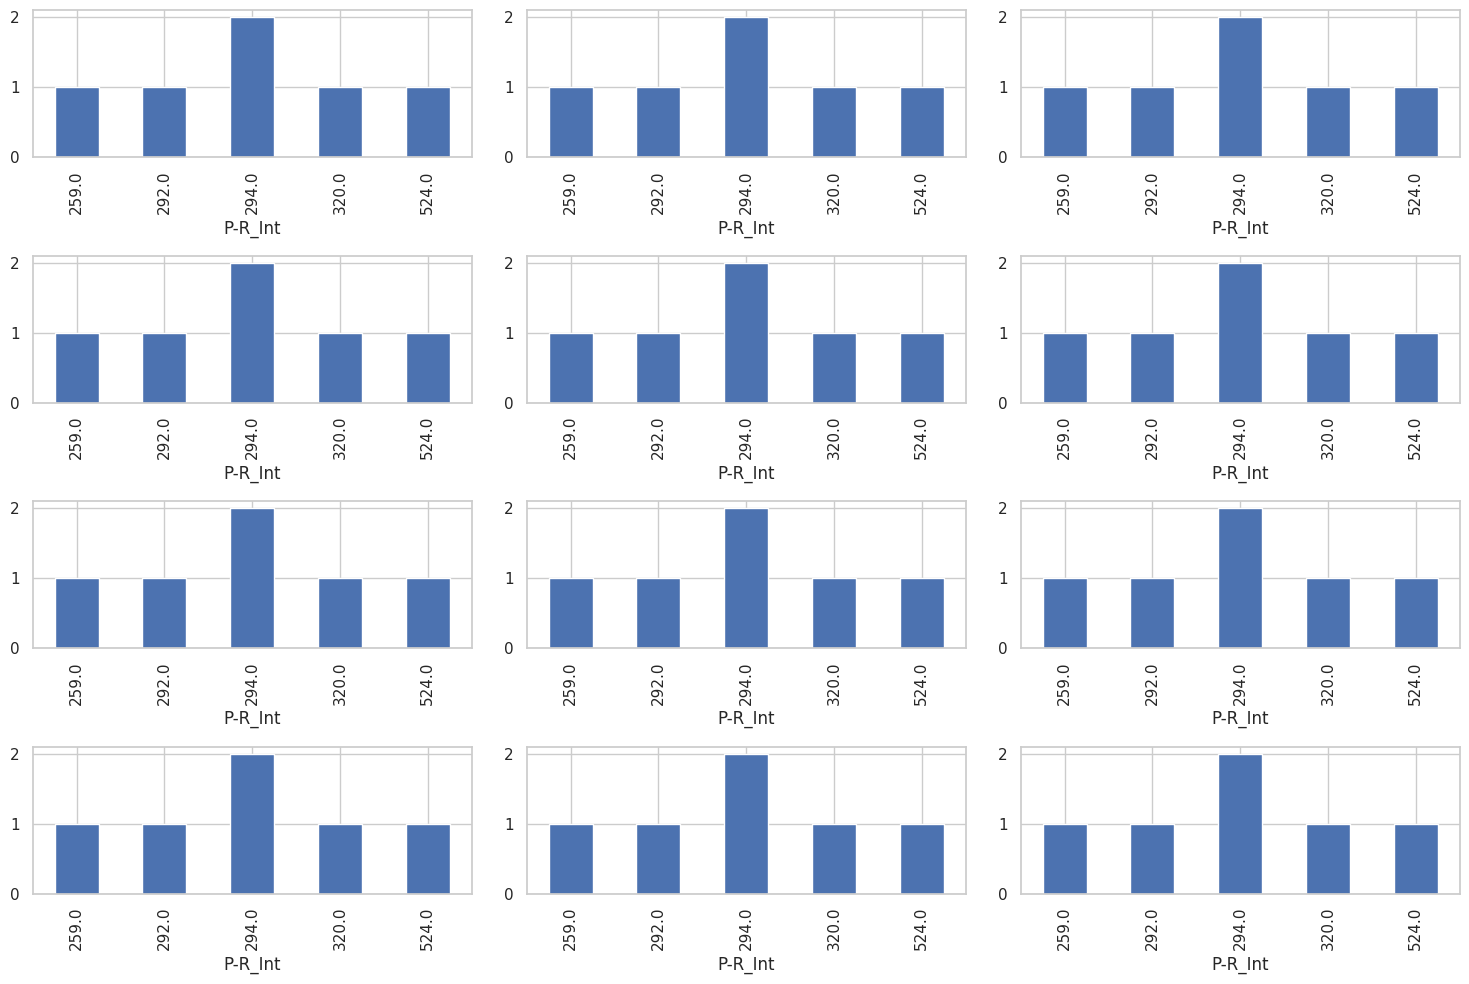

In [ ]:
sns.set(style = "whitegrid")
plt.figure(figsize=(15,10))
x = ["QRS","T","P","J","Heart_Rate","Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]
for i, column in enumerate (x,1):
  plt.subplot(4,3,i)
  final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.tight_layout()
plt.show()

In [ ]:
target=new_df["class"]
pearsoncorr = final_df.corrwith(other = target,method='pearson')
pearsoncorr.values

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([-9.63953176e-02, -1.76192726e-01, -4.00467159e-02, -9.17727611e-02,
        3.23918775e-01, -1.01886734e-01,  2.80967349e-02,  9.74853414e-02,
       -1.24816358e-01,  2.19071159e-02,  1.09973839e-04,  1.91310194e-01,
       -3.07437189e-02,  3.34975965e-02,  5.06916325e-03,  4.26729753e-02,
        1.93323243e-01,  6.42496273e-02,             nan,  4.24003165e-02,
       -2.00368330e-02,  7.90239377e-03, -3.53848077e-02,  3.22668039e-02,
        3.22668039e-02,  8.33337655e-02, -2.57462471e-03,  4.96802756e-02,
        1.83319405e-01, -4.09620130e-02,  6.67239854e-02,  6.86287753e-02,
        4.20776827e-02,  8.02811682e-02, -2.00368330e-02,  1.71081283e-02,
       -3.59472363e-02, -4.06504070e-04, -2.71876432e-02,  1.16808189e-01,
        8.34787880e-02,  1.49651215e-02, -3.18332296e-02,  8.03801729e-02,
       -3.07437189e-02,  5.18840837e-02, -3.07437189e-02, -8.38254438e-02,
       -1.13363624e-02, -5.62988506e-03,  2.05040713e-02,  1.75964215e-01,
        3.43370158e-03,  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target ,test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((360, 278), (91, 278), (360,), (91,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Models

In [152]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay

In [153]:
result = pd.DataFrame(columns=['Model', 'Train Accuracy','Test Accuracy'])

KNN Classifier

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [155]:
test_accuracy = accuracy_score(y_test,y_test_pred)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_recall = recall_score(y_test,y_test_pred,average='weighted')
train_recall = recall_score(y_train,y_train_pred,average='weighted')

In [156]:
test_accuracy,train_accuracy

(0.6043956043956044, 0.6361111111111111)

In [157]:
print('Train Recall score: {}'
      .format(train_recall))
print('Test Recall score: {}'
      .format(test_recall))
confusion_matrix(y_test, y_test_pred)
# disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,display_labels=class_names,normalize=None )

Train Recall score: 0.6361111111111111
Test Recall score: 0.6043956043956044


array([[49,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [11,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [158]:
result = pd.concat([result, pd.DataFrame([{'Model': 'KNN Classifier', 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}])], ignore_index=True)

In [159]:
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396


Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(solver = 'saga',random_state = 0)
lgclassifier.fit(X_train, y_train)
y_pred = lgclassifier.predict(X_test)

In [161]:
lg_train_recall = recall_score(y_train, lgclassifier.predict(X_train),average='weighted')
lg_test_recall = recall_score(y_test, lgclassifier.predict(X_test),average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(X_test))

In [162]:
print('Train Recall score: {}'
      .format(lg_train_recall))
print('Test Recall score: {}'
      .format(lg_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.9416666666666667
Test Recall score: 0.7252747252747253


array([[44,  2,  0,  0,  0,  1,  0,  1,  0,  0,  2],
       [ 1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  1,  0,  0,  0, 11,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0]])

In [163]:
result = pd.concat([result, pd.DataFrame([{'Model':'Logestic Regression','Train Accuracy':lg_train_accuracy,'Test Accuracy':lg_test_accuracy}])], ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396
1,Logestic Regression,0.941667,0.725275


Decision Tree Classifier

In [164]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtclassifier.fit(X_train, y_train)
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)


In [165]:
dt_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
dt_test_recall = recall_score(y_test, y_pred_test,average="weighted")
dt_train_accuracy = accuracy_score(y_train,y_pred_train )
dt_test_accuracy = accuracy_score(y_test, y_pred_test)

In [166]:
print('Train Recall score: {}'
      .format(dt_train_recall))
print('Test Recall score: {}'
      .format(dt_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7694444444444445
Test Recall score: 0.6043956043956044


array([[45,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  1,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  1,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 8,  0,  0,  1,  1,  0,  0,  5,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [167]:
result = pd.concat([result, pd.DataFrame([{'Model':'Decision Tree Classifier','Train Accuracy':dt_train_accuracy,'Test Accuracy':dt_test_accuracy}])], ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396
1,Logestic Regression,0.941667,0.725275
2,Decision Tree Classifier,0.769444,0.604396


Linear SVM

In [168]:
from sklearn.svm import LinearSVC
lsvclassifier = LinearSVC(C=0.01)
lsvclassifier.fit(X_train, y_train)
y_pred_test = lsvclassifier.predict(X_test)
y_pred_train = lsvclassifier.predict(X_train)

In [169]:
lsvc_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvc_test_accuracy = accuracy_score(y_test, y_pred_test)
lsvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
lsvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [170]:
print('Train Recall score: {}'
      .format(lsvc_train_recall))
print('Test Recall score: {}'
      .format(lsvc_test_recall))
confusion_matrix(y_test, y_pred_test)


Train Recall score: 0.8972222222222223
Test Recall score: 0.7472527472527473


array([[46,  2,  0,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0, 13,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [171]:
result = pd.concat([result, pd.DataFrame([{'Model':'Linear SVM','Train Accuracy':lsvc_train_accuracy,'Test Accuracy':lsvc_test_accuracy}])], ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396
1,Logestic Regression,0.941667,0.725275
2,Decision Tree Classifier,0.769444,0.604396
3,Linear SVM,0.897222,0.747253


Kernelized SVM

In [172]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)
KSVC_clf.fit(X_train, y_train)
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

In [173]:
ksvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
ksvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

ksvc_train_accuracy = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy = accuracy_score(y_test, y_pred_test)

In [174]:
print('Train Recall score: {}'
      .format(ksvc_train_recall))
print('Test Recall score: {}'
      .format(ksvc_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8583333333333333
Test Recall score: 0.6923076923076923


array([[45,  1,  0,  0,  0,  1,  0,  0,  0,  0,  3],
       [ 1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  9,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [175]:
result = pd.concat([result, pd.DataFrame([{'Model':'Kernelized SVM','Train Accuracy':ksvc_train_accuracy,'Test Accuracy':ksvc_test_accuracy}])], ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396
1,Logestic Regression,0.941667,0.725275
2,Decision Tree Classifier,0.769444,0.604396
3,Linear SVM,0.897222,0.747253
4,Kernelized SVM,0.858333,0.692308


Random Forest Classifier


In [176]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300)

In [177]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
rf_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [178]:
print('Train Recall score: {}'
      .format(rf_train_recall))
print('Test Recall score: {}'
      .format(rf_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8972222222222223
Test Recall score: 0.7582417582417582


array([[49,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0, 11,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [179]:
result = pd.concat([result, pd.DataFrame([{'Model':'Random Forest Classifier','Train Accuracy':rf_train_accuracy,'Test Accuracy':rf_test_accuracy}])], ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396
1,Logestic Regression,0.941667,0.725275
2,Decision Tree Classifier,0.769444,0.604396
3,Linear SVM,0.897222,0.747253
4,Kernelized SVM,0.858333,0.692308
5,Random Forest Classifier,0.897222,0.758242


# PCA

In [205]:
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396
1,Logestic Regression,0.941667,0.725275
2,Decision Tree Classifier,0.769444,0.604396
3,Linear SVM,0.897222,0.747253
4,Kernelized SVM,0.858333,0.692308
5,Random Forest Classifier,0.897222,0.758242
6,KNN Classifier with PCA,0.644444,0.615385
7,Logestic Regression with PCA,0.911111,0.725275
8,Linear SVC with PCA,0.825000,0.703297
9,Random Forest Classifier with PCA,0.911111,0.637363


In [206]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca.fit(X_train)
pca.n_components_,X_train.shape

(np.int64(123), (360, 278))

In [207]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [208]:
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV

KNN with PCA

In [209]:
from sklearn.neighbors import KNeighborsClassifier
knnp_clf = KNeighborsClassifier(n_neighbors=5)
knnp_clf.fit(X_train_pca, y_train)
y_pred_train = knnp_clf.predict(X_train_pca)
y_pred_test = knnp_clf.predict(X_test_pca)

In [210]:
knnp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
knnp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
knnp_train_accuracy = accuracy_score(y_train, y_pred_train)
knnp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [211]:
print('Train Recall score: {}'
      .format(knnp_train_recall))
print('Test Recall score: {}'
      .format(knnp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6444444444444445
Test Recall score: 0.6153846153846154


array([[49,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [10,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [212]:
result = pd.concat([result, pd.DataFrame([{'Model':'KNN Classifier with PCA','Train Accuracy':knnp_train_accuracy,'Test Accuracy':knnp_test_accuracy}])],ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396
1,Logestic Regression,0.941667,0.725275
2,Decision Tree Classifier,0.769444,0.604396
3,Linear SVM,0.897222,0.747253
4,Kernelized SVM,0.858333,0.692308
5,Random Forest Classifier,0.897222,0.758242
6,KNN Classifier with PCA,0.644444,0.615385
7,Logestic Regression with PCA,0.911111,0.725275
8,Linear SVC with PCA,0.825000,0.703297
9,Random Forest Classifier with PCA,0.911111,0.637363


Logistic with PCA

In [213]:
lgclassifier_pca = LogisticRegression(solver = 'saga',random_state = 0)
lgclassifier_pca.fit(X_train_pca, y_train)
y_pred_train_pca = lgclassifier_pca.predict(X_train_pca)
y_pred_test_pca = lgclassifier_pca.predict(X_test_pca)

lg_train_recall_pca = recall_score(y_train, y_pred_train_pca,average='weighted')
lg_test_recall_pca = recall_score(y_test, y_pred_test_pca,average='weighted')
lg_train_accuracy_pca = accuracy_score(y_train, y_pred_train_pca)
lg_test_accuracy_pca = accuracy_score(y_test, y_pred_test_pca)

print('Train Recall score (PCA): {}'
      .format(lg_train_recall_pca))
print('Test Recall score (PCA): {}'
      .format(lg_test_recall_pca))

print('Train Accuracy score (PCA): {}'
      .format(lg_train_accuracy_pca))
print('Test Accuracy score (PCA): {}'
      .format(lg_test_accuracy_pca))

confusion_matrix(y_test, y_pred_test_pca)

Train Recall score (PCA): 0.9111111111111111
Test Recall score (PCA): 0.7252747252747253
Train Accuracy score (PCA): 0.9111111111111111
Test Accuracy score (PCA): 0.7252747252747253


array([[44,  2,  0,  0,  0,  1,  0,  1,  0,  0,  2],
       [ 1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  1,  0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [214]:
result = pd.concat([result, pd.DataFrame([{'Model':'Logestic Regression with PCA','Train Accuracy':lg_train_accuracy_pca,'Test Accuracy':lg_test_accuracy_pca}])], ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396
1,Logestic Regression,0.941667,0.725275
2,Decision Tree Classifier,0.769444,0.604396
3,Linear SVM,0.897222,0.747253
4,Kernelized SVM,0.858333,0.692308
5,Random Forest Classifier,0.897222,0.758242
6,KNN Classifier with PCA,0.644444,0.615385
7,Logestic Regression with PCA,0.911111,0.725275
8,Linear SVC with PCA,0.825000,0.703297
9,Random Forest Classifier with PCA,0.911111,0.637363


Linear svm with PCA

In [215]:
from sklearn.svm import LinearSVC
LSVC_clf = LinearSVC(C=0.001)
LSVC_clf.fit(X_train_pca, y_train)
y_pred_train = LSVC_clf.predict(X_train_pca)
y_pred_test = LSVC_clf.predict(X_test_pca)
lsvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lsvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lsvcp_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvcp_test_accuracy = accuracy_score(y_test, y_pred_test)
print('Train Recall score: {}'
      .format(lsvcp_train_recall))
print('Test Recall score: {}'
      .format(lsvcp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.825
Test Recall score: 0.7032967032967034


array([[43,  4,  0,  0,  0,  0,  0,  1,  0,  0,  2],
       [ 0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0, 12,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [216]:
result = pd.concat([result, pd.DataFrame([{'Model':'Linear SVC with PCA','Train Accuracy':lsvcp_train_accuracy,'Test Accuracy':lsvcp_test_accuracy}])],ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396
1,Logestic Regression,0.941667,0.725275
2,Decision Tree Classifier,0.769444,0.604396
3,Linear SVM,0.897222,0.747253
4,Kernelized SVM,0.858333,0.692308
5,Random Forest Classifier,0.897222,0.758242
6,KNN Classifier with PCA,0.644444,0.615385
7,Logestic Regression with PCA,0.911111,0.725275
8,Linear SVC with PCA,0.825000,0.703297
9,Random Forest Classifier with PCA,0.911111,0.637363


Kernal svm with PCA

In [217]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)

KSVC_clf.fit(X_train_pca, y_train)
y_pred_train = KSVC_clf.predict(X_train_pca)
y_pred_test = KSVC_clf.predict(X_test_pca)
ksvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
ksvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
ksvcp_train_accuracy = accuracy_score(y_train, y_pred_train,)
ksvcp_test_accuracy = accuracy_score(y_test, y_pred_test)
print('Train Recall score: {}'
      .format(ksvcp_train_recall))
print('Test Recall score: {}'
      .format(ksvcp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.85
Test Recall score: 0.7032967032967034


array([[46,  2,  0,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  9,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [218]:
result = pd.concat([result, pd.DataFrame([{'Model':'kernelized SVC with PCA','Train Accuracy':ksvcp_train_accuracy,'Test Accuracy':ksvcp_test_accuracy}])],ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396
1,Logestic Regression,0.941667,0.725275
2,Decision Tree Classifier,0.769444,0.604396
3,Linear SVM,0.897222,0.747253
4,Kernelized SVM,0.858333,0.692308
5,Random Forest Classifier,0.897222,0.758242
6,KNN Classifier with PCA,0.644444,0.615385
7,Logestic Regression with PCA,0.911111,0.725275
8,Linear SVC with PCA,0.825000,0.703297
9,Random Forest Classifier with PCA,0.911111,0.637363


Random Forest Classifier with PCA

In [219]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_pca = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf_pca.fit(X_train_pca, y_train)

y_pred_train_pca = rf_clf_pca.predict(X_train_pca)
y_pred_test_pca = rf_clf_pca.predict(X_test_pca)

rf_train_accuracy_pca = accuracy_score(y_train, y_pred_train_pca)
rf_test_accuracy_pca = accuracy_score(y_test, y_pred_test_pca)
rf_train_recall_pca = recall_score(y_train,y_pred_train_pca,average="weighted" )
rf_test_recall_pca = recall_score(y_test, y_pred_test_pca,average="weighted")

print('Train Recall score (PCA): {}'
      .format(rf_train_recall_pca))
print('Test Recall score (PCA): {}'
      .format(rf_test_recall_pca))

print('Train Accuracy score (PCA): {}'
      .format(rf_train_accuracy_pca))
print('Test Accuracy score (PCA): {}'
      .format(rf_test_accuracy_pca))

confusion_matrix(y_test, y_pred_test_pca)

Train Recall score (PCA): 0.9111111111111111
Test Recall score (PCA): 0.6483516483516484
Train Accuracy score (PCA): 0.9111111111111111
Test Accuracy score (PCA): 0.6483516483516484


array([[46,  2,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  9,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [220]:
result = pd.concat([result, pd.DataFrame([{'Model':'Random Forest Classifier with PCA','Train Accuracy':rf_train_accuracy_pca,'Test Accuracy':rf_test_accuracy_pca}])], ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396
1,Logestic Regression,0.941667,0.725275
2,Decision Tree Classifier,0.769444,0.604396
3,Linear SVM,0.897222,0.747253
4,Kernelized SVM,0.858333,0.692308
5,Random Forest Classifier,0.897222,0.758242
6,KNN Classifier with PCA,0.644444,0.615385
7,Logestic Regression with PCA,0.911111,0.725275
8,Linear SVC with PCA,0.825000,0.703297
9,Random Forest Classifier with PCA,0.911111,0.637363


DecisionTree Classifier with PCA

In [221]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 2,max_depth=5)
dt_clf.fit(X_train_pca, y_train)
y_pred_train = dt_clf.predict(X_train_pca)
y_pred_test = dt_clf.predict(X_test_pca)
dtp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
dtp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
dtp_train_accuracy = accuracy_score(y_train, y_pred_train)
dtp_test_accuracy = accuracy_score(y_test, y_pred_test)
print('Train Recall score: {}'
      .format(dtp_train_recall))
print('Test Recall score: {}'
      .format(dtp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7805555555555556
Test Recall score: 0.5714285714285714


array([[43,  1,  0,  1,  2,  1,  0,  0,  0,  0,  2],
       [ 1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  3],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  1,  0,  1,  1,  1,  0,  6,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [222]:
result = pd.concat([result, pd.DataFrame([{'Model':'DecisionTree Classifier with PCA','Train Accuracy':dtp_train_accuracy,'Test Accuracy':dtp_test_accuracy}])],ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.636111,0.604396
1,Logestic Regression,0.941667,0.725275
2,Decision Tree Classifier,0.769444,0.604396
3,Linear SVM,0.897222,0.747253
4,Kernelized SVM,0.858333,0.692308
5,Random Forest Classifier,0.897222,0.758242
6,KNN Classifier with PCA,0.644444,0.615385
7,Logestic Regression with PCA,0.911111,0.725275
8,Linear SVC with PCA,0.825000,0.703297
9,Random Forest Classifier with PCA,0.911111,0.637363


# Result

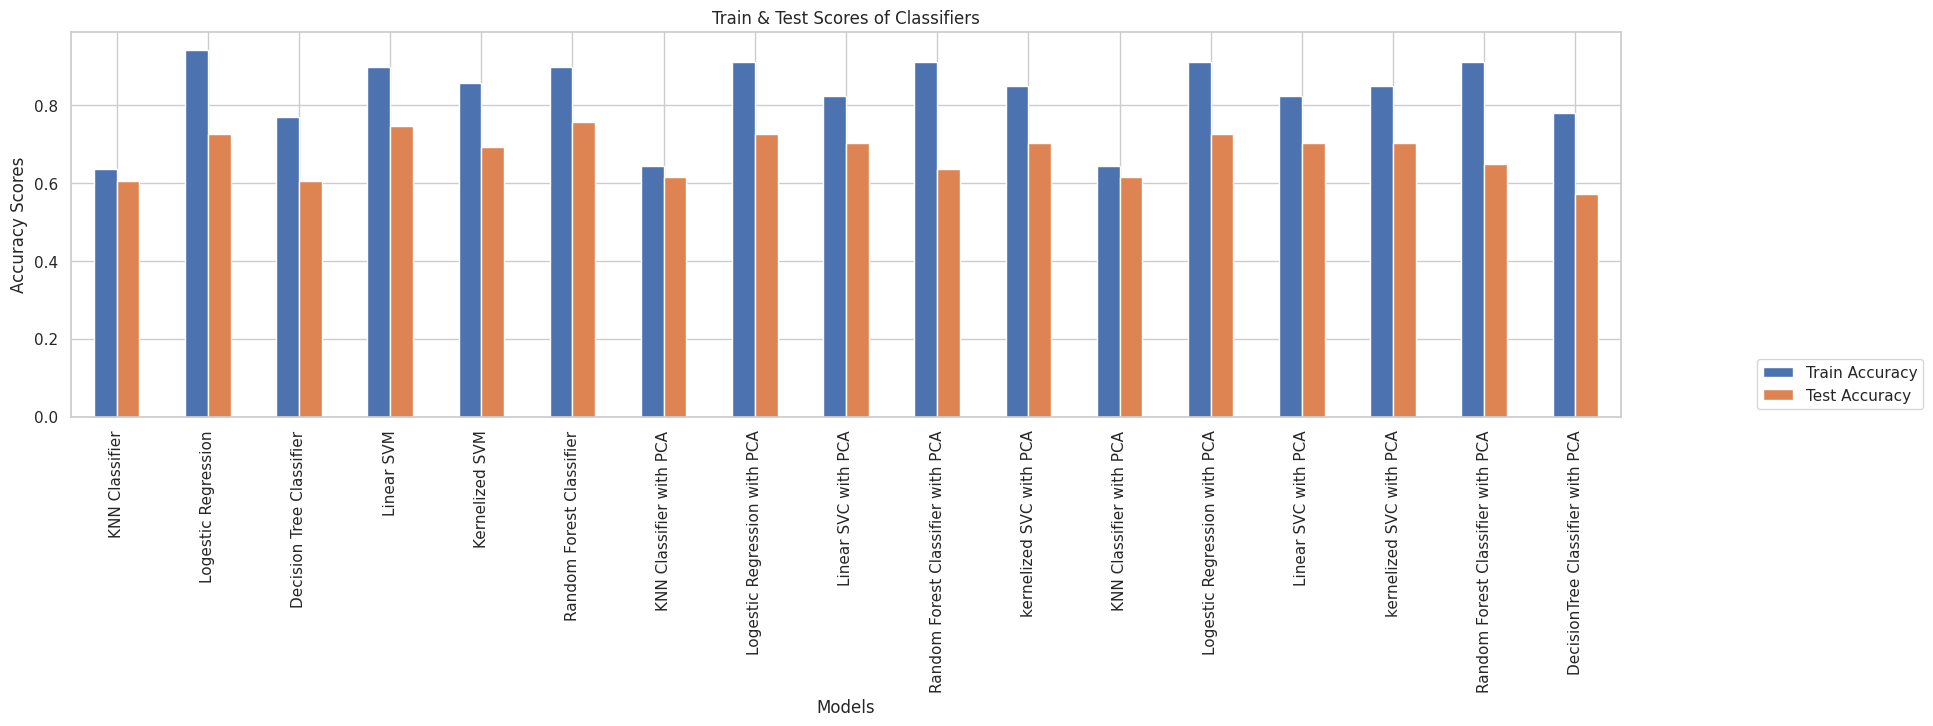

In [223]:
ax=result.plot(kind="bar",figsize=(20,5))
ax.set_xticks(result.index)
ax.set_xticklabels(result.Model,rotation=90)
plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();